***
<a id='lesson-9'></a>
# Epicycle: a circle rolling over another circle
***

Circle moving on other circle is a frequent motif in the models of planetary model.  For example, imagine descirbing the motion of moon; in a helio-centric model, moon circles earth while the earth circles around the sun. 

Fourier showed that ANY curve can be described as a motion of a circle which is moving on another circle, which is moving on another circle and so on. In this lesson, we will explore the Fourier analysis using complex numbers.

We want to model a closed curve in two dimensions; as a simplistic example, consider a circle with center at origin given by $x^2 + y^2 = c^2$, with $c$ being the radius of the circle. Of specific interest is the parametric description with parameter $t$, the circle has following parametric description: $x(t) = c \cos(t)$ and $y(t) = c \sin(t)$. The complex number description of this parametrization is given by $z(t) = c \exp(j t)$ where $j= \sqrt{-1}$. 

Let us consider:  $z(t) = c e^{jt}$, this has $z(t) = z(t+ 2 \pi)$, i.e. with a period of $2\pi$ any point returns to itself. 

Now consider: $z(t) = c e^{njt}$, this has $z(t) = z(t + 2\pi/n)$, i.e. with a period of $2\pi/n$ evey point returns to itself. 

For the sake of having a period 1 unit of time and fractions of it, we will consider $z(t) = c e^{2\pi n j t}$, which has a period of 1/n unit of time.


In [1]:
import cmath

See python documentation for `cmath` at https://docs.python.org/3.5/library/cmath.html

Note the small gap in the circle (right figure above). This is by construction, via tvals!

Consider an epicycle given by: $z(t) = c_1 e^{2\pi jt} + c_2 e^{30*2\pi jt}$

Above curve become more smoother as number of points (here 201) is increased!

Notice the gap, due to tvals.

In [2]:
def z(t):
    return 1 * numpy.exp(2j*1*math.pi*t) + 0.5*numpy.exp(2j*-1*math.pi*t)

In [3]:
m=1000
ts = [i*1.0/m for i in range(m)]

In [4]:
import matplotlib.pyplot
import math
import numpy

In [5]:
l1 = [[],[]]
for i in range(m):
    l1[0].append(numpy.real(z(ts[i])))
    l1[1].append(numpy.imag(z(ts[i])))

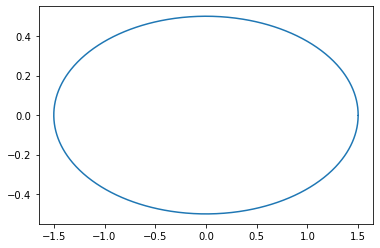

In [6]:
matplotlib.pyplot.plot(l1[0],l1[1])

Consider that there are a series of observations $\vec{r}_i= (x_i,y_i),\, i\in[1,N]$. We will form the closed curve by $\vec{r}_{N+i} = \vec{r}_i$. We want to find a epicyclic desription of the complex function $z(t)$ such that for $t_i=\tau*i$, we have $z(t_i)=(x_i,y_i)$.  That is, we want to find a description
$$  z(t) = \sum_n c_n * e^{2 \pi j~n~t} \tag{eq:1}
$$
where the coefficient $c_n$ can be a complex number, and $n \in \mathcal{Z}$; later we will show that 
$\tau = \frac{1}{N}$.

Lets try formulate the problem. Given $z_i \forall i \in [1,N]$, with $z_i \equiv z(t_i)$, find $c_n$ in the Equation eq:1 above. 

Solution: Consider $$z(t)*e^{- 2\pi j m t} = \sum_n c_n * e^{2 \pi j~(n-m)~t}$$
then integrating on both sides from $t=0$ $t=1$, gives us 
$$ \int_0^1 dt~z(t)*e^{- 2\pi j m t} = c_m \implies c_m = \tau \sum_{i=1}^{N} z_i*e^{-2\pi j m~i \tau}
$$
Typically $c_n$ is found for $|n| \le n_{max}$ i.e. $n \in [-n_{max}, \cdots, 0 , \cdots, -n_{max}]$

Lets try on the following example: `curve_para-1-v2.dat`

Another intersting example is below: 

In [7]:
fig_pi = numpy.loadtxt(r"C:\Users\renur\Downloads\pi-3.txt")

In [8]:
zvals_pi = fig_pi[:,0]+1j*fig_pi[:,1]

In [9]:
def calculatec(m,zvals_pi):
    length=len(zvals_pi)
    index=[i+1 for i in range(length)]
    Sum=0+0j
    for i in index:
        Sum+=zvals_pi[i-1]*numpy.exp(2*1j*-1*m*math.pi*i*(1/(length)))
    
    return Sum/length

In [10]:
def determine_coefficients(zvals_pi, n):
    list=[]
    for i in range(-n,n+1):
        list.append(calculatec(i,zvals_pi))
    return list

In [11]:
import numpy
pi_fourier_list = determine_coefficients(zvals_pi, 15)


In [12]:
def plot_epicycles(pi_fourier_list,length):
    times=[i*(1/100) for i in range(101)]
    points=[]
    for t in times:
        Sum= 0
        for m in range(-15,16):
            Sum+=pi_fourier_list[m+15]*numpy.exp(2j*m*math.pi*t)
        points.append(Sum)
    return numpy.array(points, dtype="complex")

In [13]:
reconstructed_pi = plot_epicycles(pi_fourier_list,15)

Text(0.5, 1.0, 'pi')

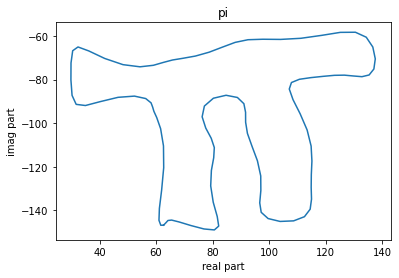

In [14]:
import matplotlib
matplotlib.pyplot.plot(reconstructed_pi.real,reconstructed_pi.imag)
matplotlib.pyplot.xlabel('real part')
matplotlib.pyplot.ylabel('imag part')
matplotlib.pyplot.title('pi')

In [15]:
fig_pi = numpy.loadtxt(r"C:\Users\renur\Downloads\hut-2.txt")

In [16]:
zvals_pi = fig_pi[:,0]+1j*fig_pi[:,1]

In [17]:
pi_fourier_list = determine_coefficients(zvals_pi, 15)
pi_fourier_list


[(0.22179008322546975+0.2512669662502102j),
 (0.5146871512958628-0.02407744124080369j),
 (-0.3720192366441342-0.03155783572782306j),
 (0.009735426953122222+0.28354165722325214j),
 (0.00796556009058341+0.26072750129816785j),
 (0.1545872992625337-0.37795296262224815j),
 (0.5362221686035855+0.3834249892292939j),
 (0.3925368644681628-0.7119153191160391j),
 (0.12935622535356117-1.1725970509094268j),
 (0.23284991073100775-0.3273551015574951j),
 (1.1794896750774577-1.2194511512187105j),
 (-3.998328605111952+3.9987551094708884j),
 (-0.5283274214635904+0.9299508419227688j),
 (-9.48223460825867+2.582307044069098j),
 (1.7232582730835846-3.561153932827535j),
 (102.46166648148149+91.11839848148149j),
 (8.111844533900909-41.505775500120976j),
 (-0.3254646722644936+5.67815979291893j),
 (-3.66093274675141+5.219370939638437j),
 (0.19648172694546207+0.5019292995404971j),
 (-2.790659710986478+2.358709914571004j),
 (0.7920145250831472+0.41397080763383876j),
 (-0.8583276495558607+0.15949826854440927j),
 (0

In [18]:
reconstructed_pi = plot_epicycles(pi_fourier_list,15)

Text(0.5, 1.0, 'hut')

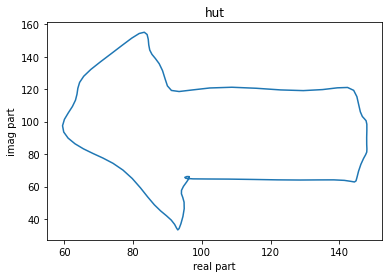

In [19]:
matplotlib.pyplot.plot(reconstructed_pi.real,reconstructed_pi.imag)
matplotlib.pyplot.xlabel('real part')
matplotlib.pyplot.ylabel('imag part')
matplotlib.pyplot.title('hut')

In [20]:
fig_pi = numpy.loadtxt(r"C:\Users\renur\Downloads\curve_para-1-v2.txt")

In [21]:
zvals_pi = fig_pi[:,0]+1j*fig_pi[:,1]

In [22]:
pi_fourier_list = determine_coefficients(zvals_pi, 15)

In [23]:
reconstructed_pi = plot_epicycles(pi_fourier_list,15)

Text(0.5, 1.0, 'curve 1')

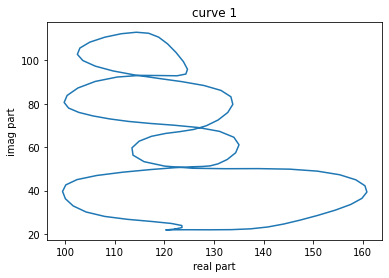

In [24]:
matplotlib.pyplot.plot(reconstructed_pi.real,reconstructed_pi.imag)
matplotlib.pyplot.xlabel('real part')
matplotlib.pyplot.ylabel('imag part')
matplotlib.pyplot.title('curve 1')


## short note on making shapes
We will use inkscape program. Draw a shape in inkscape. Save the file as svg, for example 'pi.svg'. From this file, we will extract the path.

Run the following command  in a terminal: 

`grep -v 'inkscape' pi.svg | grep -e cx -e cy  | sed -e 's/"//g' -e 's/cx=//g' -e 's/cy=//g' -e 's/\/>//g' > pi.dat`

Now check to make sure the final output file `pi.dat` has only numbers and no text! If it has, then manually delete the text.

In the Jupyter notebook run the following commands:
`curve_pi = loadtxt('pi.dat') # command to load the data` 
and then 
`curve_pi = curve_pi.reshape((shape(curve_pi)[0]/2,2))`


In [25]:
#curve_pi = loadtxt('/tmp/pi.dat')

In [26]:
#x_pi = curve_pi[1::4]
#y_pi = -curve_pi[::4]
#plot(x_pi,y_pi,'-o')